## A)

In [1]:
import random
import math

prob = 1 
for i in range(1000):
    prob *= random.random()
    print(f"After multiplying {i +1} times, prob = {prob}")
    
print(prob)

After multiplying 1 times, prob = 0.8014744360046032
After multiplying 2 times, prob = 0.33451714839492863
After multiplying 3 times, prob = 0.035294208049980264
After multiplying 4 times, prob = 0.018281917397504063
After multiplying 5 times, prob = 0.017776794537936506
After multiplying 6 times, prob = 0.004687886580437429
After multiplying 7 times, prob = 8.623935197316455e-05
After multiplying 8 times, prob = 1.977147645448977e-05
After multiplying 9 times, prob = 1.3661187118792139e-05
After multiplying 10 times, prob = 1.0602132419660848e-05
After multiplying 11 times, prob = 4.063328353587524e-06
After multiplying 12 times, prob = 1.5630490854954952e-06
After multiplying 13 times, prob = 9.43505525874397e-07
After multiplying 14 times, prob = 3.190091483422224e-07
After multiplying 15 times, prob = 1.338453833180732e-07
After multiplying 16 times, prob = 8.976239437053184e-08
After multiplying 17 times, prob = 8.154822739473468e-08
After multiplying 18 times, prob = 5.2111270515

After multiplying 986 times, prob = 0.0
After multiplying 987 times, prob = 0.0
After multiplying 988 times, prob = 0.0
After multiplying 989 times, prob = 0.0
After multiplying 990 times, prob = 0.0
After multiplying 991 times, prob = 0.0
After multiplying 992 times, prob = 0.0
After multiplying 993 times, prob = 0.0
After multiplying 994 times, prob = 0.0
After multiplying 995 times, prob = 0.0
After multiplying 996 times, prob = 0.0
After multiplying 997 times, prob = 0.0
After multiplying 998 times, prob = 0.0
After multiplying 999 times, prob = 0.0
After multiplying 1000 times, prob = 0.0
0.0


The first equation converges to 0. This is because the product of probalities result in a number that is too small to be represented.

On the other hand, the second equation prevents this underflow as it takes the summation instead.

## B)

# Instructions
1) Change the path of the dataset below   2) Run every cell until the end to recieve plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/anthonymunoz/ISTDTerm6/MachineLearning/01.112 Machine Learning/HW3/HW3_data/4/diabetes_train.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.0,0.54,0.68,0.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.0,0.74,1.59,1.18,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.25,0.88,0.59,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.0,0.28,1.80,1.17,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.39,1.35,0.55,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [3]:
# Formatting the input data
x = df.iloc[:, 1:].to_numpy()
print(x.shape)
x_train = np.hstack((x, np.ones((x.shape[0], 1), dtype=x.dtype)))
print(x_train[0])
print(x_train.shape)
y_train = df.iloc[:, 0].to_numpy()
print(y_train[0])
print(y_train.shape)

(3000, 20)
[0.54 0.68 0.65 1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
 1.   0.   0.   0.   1.   0.   1.  ]
(3000, 21)
-1.0
(3000,)


In [4]:
def log_likelihood(x, y, weight):
    total_risk = 0
    for i in range(len(x)):
        total_risk += math.log((1 + math.exp(-y[i] * np.dot(x[i], weight))))
    return total_risk


def gradient_update(x, y, weight):
    return ((-1 * y * x.T)/(1 + math.exp(y * np.dot(x, weight)))).reshape(-1, 1)

In [5]:
def sgd(x_train, y_train, lr=0.1, num_iterations=10000):
    random_order = random.sample(range(len(x_train)), len(x_train))
    weight = np.zeros((x_train.shape[1], 1))
    min_emp_risk = float("inf")
    losses = []
    weights = []
    
    for i in (range(num_iterations)):
        t = random.randint(0, x_train.shape[0]-1)
        update = gradient_update(x_train[t], y_train[t], weight)
        emp_risk = log_likelihood(x_train, y_train, weight)
        
        ## we save our weight by finding min risk.
        weight -= lr * update 
    
        if i % 100 == 99: 
            losses.append(-emp_risk)
            weights.append(weight)    

    return losses, weights

In [6]:
losses, weights = sgd(x_train, y_train)

Text(0,0.5,'log-likelihood')

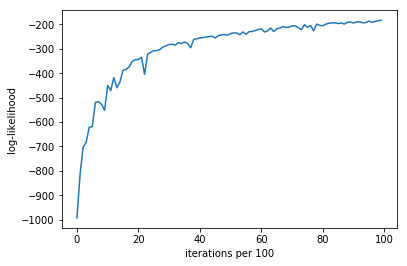

In [7]:
plt.plot(range(len(losses)), losses)
plt.xlabel("iterations per 100")
plt.ylabel("log-likelihood")